In [3]:
import numpy as np
import os
import tifffile
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [6]:
intensity_dir = "C:/Users/Geneva/Box/03_Shared/PolLFM/Xylem cells/rectification/intensity_slice_14"
image_names = os.listdir(intensity_dir)
image_names.sort()
intensity_images = []
for image_name in image_names:
    image = tifffile.imread(os.path.join(intensity_dir, image_name))
    intensity_images.append(image)

# Take the sum of the intensity images
intensity_sum = np.zeros_like(intensity_images[0])
for image in intensity_images:
    intensity_sum += image

# Normalize the intensity sum
intensity_sum = intensity_sum / np.max(intensity_sum)

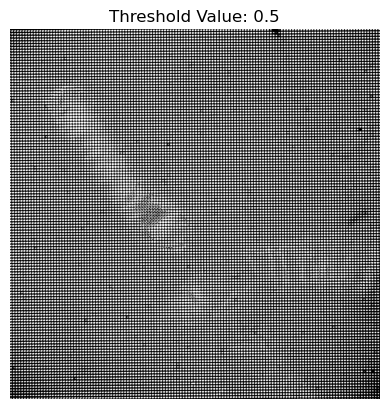

FloatSlider(value=0.5, continuous_update=False, description='Threshold:', max=1.0, step=0.01)

In [7]:
def update_threshold(threshold_value):
    intensity_sum_thresholded = np.zeros_like(intensity_sum)
    intensity_sum_thresholded[intensity_sum > threshold_value] = 1
    
    plt.imshow(intensity_sum_thresholded, cmap='gray')
    plt.title(f'Threshold Value: {threshold_value}')
    plt.axis('off')
    plt.show()

# Create a slider widget for threshold adjustment
threshold_slider = widgets.FloatSlider(
    value=0.5,  # Initial threshold value
    min=0,
    max=1.0,
    step=0.01,
    description='Threshold:',
    continuous_update=False  # Only update the image when the slider is released
)

# Connect the slider to the update_threshold function
widgets.interactive(update_threshold, threshold_value=threshold_slider)

# Display the initial thresholded image
update_threshold(0.5)

# Display the slider
display(threshold_slider)

In [10]:
np.min(intensity_sum)

4.5777065690089265e-05

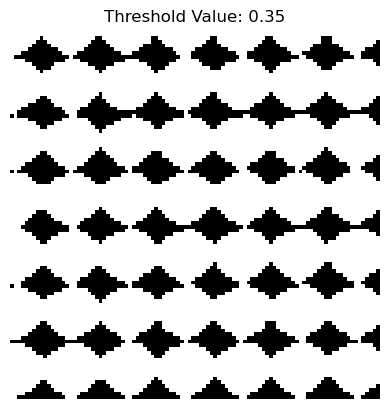

In [24]:
threshold_value = 0.35
intensity_sum_thresholded = np.zeros_like(intensity_sum)
intensity_sum_thresholded[intensity_sum > threshold_value] = 1

# Define the cropping region
crop_x_start = 150
crop_x_end = 250
crop_y_start = 150
crop_y_end = 250

# Crop the thresholded image
cropped_image = intensity_sum_thresholded[crop_y_start:crop_y_end, crop_x_start:crop_x_end]

plt.imshow(cropped_image, cmap='gray')
plt.title(f'Threshold Value: {threshold_value}')
plt.axis('off')
plt.show()

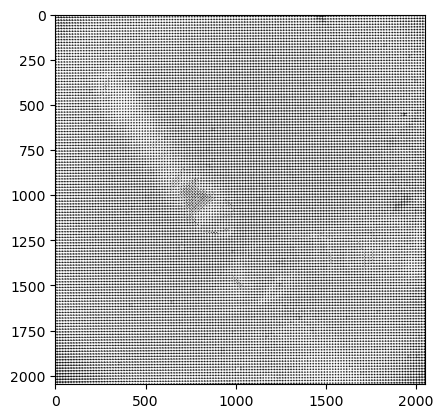

In [26]:
plt.imshow(intensity_sum_thresholded, cmap='gray')

In [31]:
threshold_filename = "C:/Users/Geneva/Box/03_Shared/PolLFM/Xylem cells/rectification/thresholded35_slice_14.tif"
tifffile.imwrite(threshold_filename, intensity_sum_thresholded)

In [ ]:
# Extract the 15th slice from the retardance and azimuth images
ret_stack_filename = "C:/Users/Geneva/Box/03_Shared/PolLFM/Xylem cells/rectification/XylemCellLightFieldLCPolRetStack.tif"
azim_stack_filename = "C:/Users/Geneva/Box/03_Shared/PolLFM/Xylem cells/rectification/XylemCellLightFieldLCPolAzimStack.tif"
ret_stack = tifffile.imread(ret_stack_filename)
azim_stack = tifffile.imread(azim_stack_filename)

slice_idx = 0
ret_slice = ret_stack[14]
azim_slice = azim_stack[14]

# Plot the 15th slice from the retardance and azimuth images
plt.figure()
plt.imshow(ret_slice)
plt.title("Retardance image")
plt.colorbar()
plt.figure()
plt.imshow(azim_slice)
plt.title("Azimuth image")
plt.colorbar()
plt.show(block=True)

# Save the 15th slice from the retardance and azimuth images
ret_slice_filename = "C:/Users/Geneva/Box/03_Shared/PolLFM/Xylem cells/rectification/raw_ret_slice_14.tif"
azim_slice_filename = "C:/Users/Geneva/Box/03_Shared/PolLFM/Xylem cells/rectification/raw_azim_slice_14.tif"
tifffile.imwrite(ret_slice_filename, ret_slice)
tifffile.imwrite(azim_slice_filename, azim_slice)

In [33]:
def save_slice(slice_idx):
    ret_stack_filename = "C:/Users/Geneva/Box/03_Shared/PolLFM/Xylem cells/rectification/XylemCellLightFieldLCPolRetStack.tif"
    azim_stack_filename = "C:/Users/Geneva/Box/03_Shared/PolLFM/Xylem cells/rectification/XylemCellLightFieldLCPolAzimStack.tif"
    ret_stack = tifffile.imread(ret_stack_filename)
    azim_stack = tifffile.imread(azim_stack_filename)

    ret_slice = ret_stack[slice_idx]
    azim_slice = azim_stack[slice_idx]

    plt.figure()
    plt.imshow(ret_slice)
    plt.title("Retardance image")
    plt.colorbar()
    plt.figure()
    plt.imshow(azim_slice)
    plt.title("Azimuth image")
    plt.colorbar()
    plt.show(block=True)

    idx_str = str(slice_idx).zfill(3)
    ret_slice_filename = f"C:/Users/Geneva/Box/03_Shared/PolLFM/Xylem cells/rectification/raw_ret_slice_{idx_str}.tif"
    azim_slice_filename = f"C:/Users/Geneva/Box/03_Shared/PolLFM/Xylem cells/rectification/raw_azim_slice_{idx_str}.tif"
    tifffile.imwrite(ret_slice_filename, ret_slice)
    tifffile.imwrite(azim_slice_filename, azim_slice)


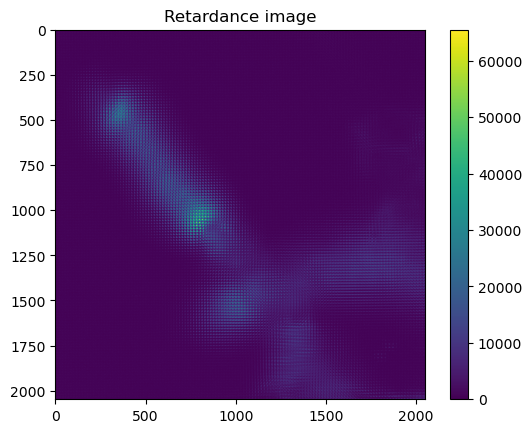

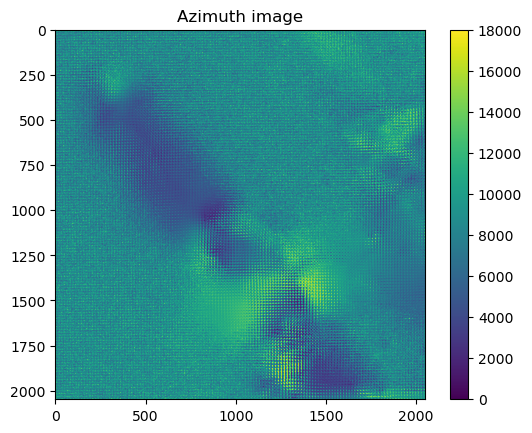

In [34]:
save_slice(0)

### Use Slice 0
Create a Radiometry image using the first slice of the intensity stack.

In [37]:
intensity_dir = "C:/Users/Geneva/Box/03_Shared/PolLFM/Xylem cells/rectification/intensity_slice_000"
image_names = os.listdir(intensity_dir)
image_names.sort()
intensity_images = []
for image_name in image_names:
    image = tifffile.imread(os.path.join(intensity_dir, image_name))
    intensity_images.append(image)

# Take the sum of the intensity images
intensity_sum = np.zeros_like(intensity_images[0])
for image in intensity_images:
    intensity_sum += image

# Normalize the intensity sum
intensity_sum = intensity_sum / np.max(intensity_sum)

# Threshold the intensity sum
threshold_value = 0.35
intensity_sum_thresholded = np.zeros_like(intensity_sum)
intensity_sum_thresholded[intensity_sum > threshold_value] = 1

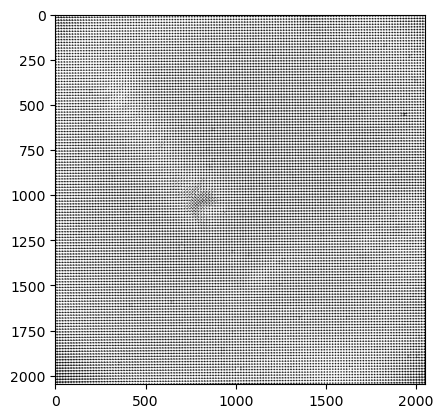

In [38]:
plt.imshow(intensity_sum_thresholded, cmap='gray')

Save the thresholded image.

In [39]:
threshold_filename = "C:/Users/Geneva/Box/03_Shared/PolLFM/Xylem cells/rectification/thresholded35_slice_000.tif"
tifffile.imwrite(threshold_filename, intensity_sum_thresholded)